In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Car resale-train.csv')
df.head()

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,1,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,...,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,2,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,...,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,3,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,...,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,4,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,...,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,5,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,...,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


Getting information about Data


In [ ]:
df.shape 

(6399, 30)

In [ ]:
df.columns

Index(['id', 'car_name', 'yr_mfr', 'fuel_type', 'kms_run', 'sale_price',
       'city', 'times_viewed', 'body_type', 'transmission', 'variant',
       'assured_buy', 'registered_city', 'registered_state', 'is_hot', 'rto',
       'source', 'make', 'model', 'car_availability', 'total_owners',
       'broker_quote', 'original_price', 'car_rating', 'ad_created_on',
       'fitness_certificate', 'emi_starts_from', 'booking_down_pymnt',
       'reserved', 'warranty_avail'],
      dtype='object')

In [ ]:
df['car_name'].value_counts()

maruti swift          478
maruti swift dzire    332
hyundai i10           330
maruti wagon r 1.0    292
hyundai grand i10     246
                     ... 
bmw x3                  1
tata manza              1
tata sumo gold          1
mahindra nuvosport      1
tata indica ev2         1
Name: car_name, Length: 182, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6399 entries, 0 to 6398
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   6399 non-null   int64  
 1   car_name             6399 non-null   object 
 2   yr_mfr               6399 non-null   int64  
 3   fuel_type            6399 non-null   object 
 4   kms_run              6399 non-null   int64  
 5   sale_price           6399 non-null   int64  
 6   city                 6399 non-null   object 
 7   times_viewed         6399 non-null   int64  
 8   body_type            6309 non-null   object 
 9   transmission         5925 non-null   object 
 10  variant              6399 non-null   object 
 11  assured_buy          6399 non-null   bool   
 12  registered_city      6391 non-null   object 
 13  registered_state     6391 non-null   object 
 14  is_hot               6399 non-null   bool   
 15  rto                  6399 non-null   o

Checking duplicate Records

In [ ]:
df.duplicated().sum()

0

Checking Null Values

In [ ]:
df.isnull().sum()

id                        0
car_name                  0
yr_mfr                    0
fuel_type                 0
kms_run                   0
sale_price                0
city                      0
times_viewed              0
body_type                90
transmission            474
variant                   0
assured_buy               0
registered_city           8
registered_state          8
is_hot                    0
rto                       0
source                  114
make                      0
model                     0
car_availability        542
total_owners              0
broker_quote              0
original_price         2824
car_rating                7
ad_created_on             1
fitness_certificate       8
emi_starts_from           0
booking_down_pymnt        0
reserved                  0
warranty_avail            0
dtype: int64

Here original_price column contains more null values so we can decide after correaltion analysis whether to remove it or not

Correlation

In [ ]:
corr=df.corr()
corr

,id,yr_mfr,kms_run,sale_price,times_viewed,assured_buy,is_hot,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
id,1.000000,0.089709,0.015080,0.032071,0.009603,0.023037,-0.080135,-0.009446,0.008309,-0.000049,0.032071,0.032071,0.004702,0.014275
yr_mfr,0.089709,1.000000,-0.396612,0.521379,0.067565,0.119977,0.204486,-0.295556,0.542951,0.502866,0.521379,0.521379,0.100374,-0.003712
kms_run,0.015080,-0.396612,1.000000,-0.098388,-0.115663,-0.015230,-0.118013,0.136007,-0.121848,-0.082849,-0.098389,-0.098388,-0.081682,0.016345
sale_price,0.032071,0.521379,-0.098388,1.000000,0.098256,0.032198,0.065627,-0.127794,0.961021,0.986196,1.000000,1.000000,0.054197,-0.013129
times_viewed,0.009603,0.067565,-0.115663,0.098256,1.000000,0.079840,0.184748,0.002830,0.131855,0.092438,0.098256,0.098256,0.223501,-0.047353
assured_buy,0.023037,0.119977,-0.015230,0.032198,0.079840,1.000000,0.380024,-0.073470,0.078595,0.009191,0.032197,0.032198,0.071509,-0.027761
is_hot,-0.080135,0.204486,-0.118013,0.065627,0.184748,0.380024,1.000000,-0.125427,0.184548,0.010380,0.065626,0.065628,0.147890,-0.348627
total_owners,-0.009446,-0.295556,0.136007,-0.127794,0.002830,-0.073470,-0.125427,1.000000,-0.150618,-0.080680,-0.127793,-0.127794,-0.056257,0.011473
broker_quote,0.008309,0.542951,-0.121848,0.961021,0.131855,0.078595,0.184548,-0.150618,1.000000,0.985439,0.961020,0.961021,0.085843,-0.061038
original_price,-0.000049,0.502866,-0.082849,0.986196,0.092438,0.009191,0.010380,-0.080680,0.985439,1.000000,0.986196,0.986196,0.080518,-0.004814


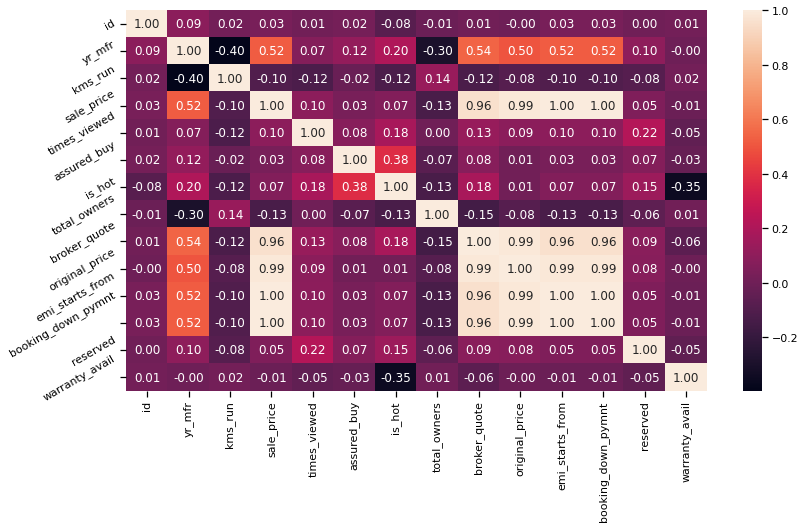

In [ ]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

We can see from the graph above that the variables sale price, emi starts from, booking down pymnt original price, and broker quote have a strong correlation with one another. Therefore, our objective variable is emi starts from, booking down payment, original price, and broker qoute.

Therefore, we can maintain any of them and remove the other columns.



I am eliminating the aforementioned columns from this table but leaving booking down payment alone because, as we saw before, it contains 2824 null values.



Moreover, Id column should be eliminated because it has no impact on our target column.

In [ ]:
def remove(df):
  df1=df.drop(['id','emi_starts_from','original_price','broker_quote'],axis=1)
  return df1
df1=remove(df)

In [ ]:
df1

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,maruti,swift,in_stock,2,great,2021-04-04T07:09:18.583,True,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,maruti,alto 800,in_stock,1,great,2021-03-22T14:07:32.833,True,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,hyundai,grand i10,in_stock,1,great,2021-03-20T05:36:31.311,True,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,maruti,swift,in_stock,1,great,2021-01-21T12:59:19.299,True,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,hyundai,grand i10,in_stock,1,great,2021-04-01T13:33:40.733,True,54225,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,toyota fortuner,2012,diesel,116838,1100000,lucknow,327,luxury suv,manual,3.0 mt 4x2,...,toyota,fortuner,NaN,2,good,2019-09-06T04:20:28.916,False,165000,False,True
6395,hyundai i20,2012,diesel,47317,370000,lucknow,214,hatchback,manual,sportz 1.4 crdi 6 speed bs iv,...,hyundai,i20,NaN,1,overpriced,2019-09-02T09:43:11.541,False,55500,False,True
6396,toyota innova,2009,diesel,274167,415000,lucknow,247,suv,manual,2.5 g4 7 str,...,toyota,innova,NaN,2,overpriced,2019-08-28T14:42:16.246,False,62250,False,False
6397,tata indica ev2,2011,diesel,119634,150000,lucknow,157,hatchback,manual,lx,...,tata,indica ev2,NaN,2,overpriced,2019-08-26T06:10:57.269,False,22500,False,False


In [ ]:
df1.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,maruti,swift,in_stock,2,great,2021-04-04T07:09:18.583,True,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,maruti,alto 800,in_stock,1,great,2021-03-22T14:07:32.833,True,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,hyundai,grand i10,in_stock,1,great,2021-03-20T05:36:31.311,True,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,maruti,swift,in_stock,1,great,2021-01-21T12:59:19.299,True,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,hyundai,grand i10,in_stock,1,great,2021-04-01T13:33:40.733,True,54225,False,False


In [ ]:
df1.isnull().sum()

car_name                 0
yr_mfr                   0
fuel_type                0
kms_run                  0
sale_price               0
city                     0
times_viewed             0
body_type               90
transmission           474
variant                  0
assured_buy              0
registered_city          8
registered_state         8
is_hot                   0
rto                      0
source                 114
make                     0
model                    0
car_availability       542
total_owners             0
car_rating               7
ad_created_on            1
fitness_certificate      8
booking_down_pymnt       0
reserved                 0
warranty_avail           0
dtype: int64

In [ ]:
df1.shape

(6399, 26)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6399 entries, 0 to 6398
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             6399 non-null   object
 1   yr_mfr               6399 non-null   int64 
 2   fuel_type            6399 non-null   object
 3   kms_run              6399 non-null   int64 
 4   sale_price           6399 non-null   int64 
 5   city                 6399 non-null   object
 6   times_viewed         6399 non-null   int64 
 7   body_type            6309 non-null   object
 8   transmission         5925 non-null   object
 9   variant              6399 non-null   object
 10  assured_buy          6399 non-null   bool  
 11  registered_city      6391 non-null   object
 12  registered_state     6391 non-null   object
 13  is_hot               6399 non-null   bool  
 14  rto                  6399 non-null   object
 15  source               6285 non-null   object
 16  make  

Handling Misssing Values

In [ ]:
df1.dtypes

car_name               object
yr_mfr                  int64
fuel_type              object
kms_run                 int64
sale_price              int64
city                   object
times_viewed            int64
body_type              object
transmission           object
variant                object
assured_buy              bool
registered_city        object
registered_state       object
is_hot                   bool
rto                    object
source                 object
make                   object
model                  object
car_availability       object
total_owners            int64
car_rating             object
ad_created_on          object
fitness_certificate    object
booking_down_pymnt      int64
reserved                 bool
warranty_avail           bool
dtype: object

I am replacing object type column missing values with their mode and numeric type columns with their mean

In [ ]:
category_columns=df1.select_dtypes(include=['object']).columns.tolist()
integer_columns=df1.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df1:
    if df1[column].isnull().any():
        if(column in category_columns):
            df1[column]=df1[column].fillna(df1[column].mode()[0])
        else:
            df1[column]=df1[column].fillna(df1[column].mean)

In [ ]:
df1.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,maruti,swift,in_stock,2,great,2021-04-04T07:09:18.583,True,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,maruti,alto 800,in_stock,1,great,2021-03-22T14:07:32.833,True,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,hyundai,grand i10,in_stock,1,great,2021-03-20T05:36:31.311,True,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,maruti,swift,in_stock,1,great,2021-01-21T12:59:19.299,True,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,hyundai,grand i10,in_stock,1,great,2021-04-01T13:33:40.733,True,54225,False,False


In [ ]:
df1.isnull().sum()

car_name               0
yr_mfr                 0
fuel_type              0
kms_run                0
sale_price             0
city                   0
times_viewed           0
body_type              0
transmission           0
variant                0
assured_buy            0
registered_city        0
registered_state       0
is_hot                 0
rto                    0
source                 0
make                   0
model                  0
car_availability       0
total_owners           0
car_rating             0
ad_created_on          0
fitness_certificate    0
booking_down_pymnt     0
reserved               0
warranty_avail         0
dtype: int64

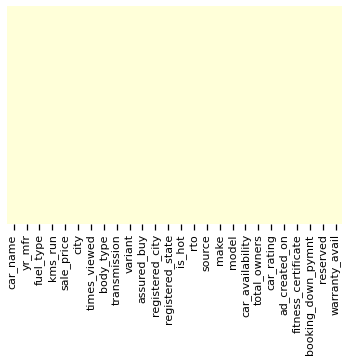

In [ ]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')


In [ ]:
df1.describe(include='object') #description about categorical data


,car_name,fuel_type,city,body_type,transmission,variant,registered_city,registered_state,rto,source,make,model,car_availability,car_rating,ad_created_on
count,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399
unique,182,5,13,5,2,873,230,16,255,3,26,182,4,4,6398
top,maruti swift,petrol,mumbai,hatchback,manual,vxi,delhi,maharashtra,mh12,inperson_sale,maruti,swift,in_stock,great,2019-02-20T14:13:30.464
freq,478,4001,1144,3888,5855,573,840,1820,331,6018,2756,478,6146,5454,2


Handling Outliers

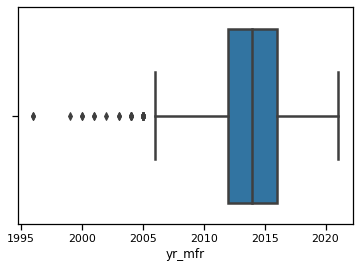

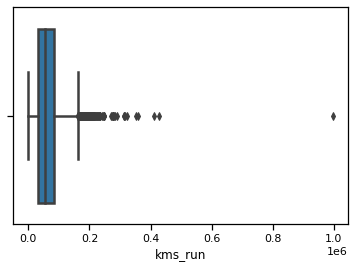

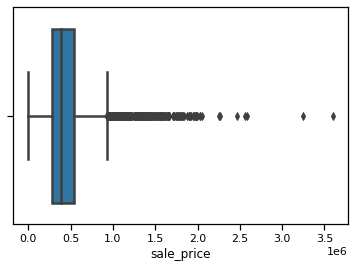

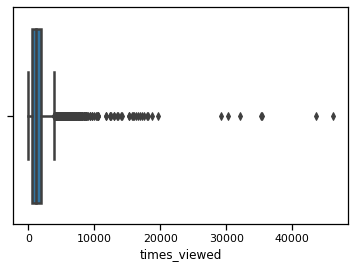

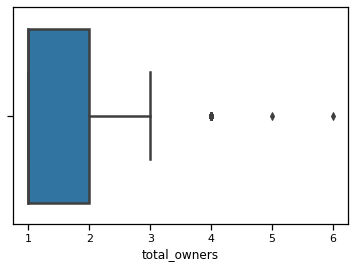

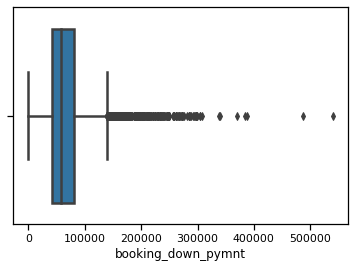

In [ ]:
for i in integer_columns:
  plt.figure()
  sns.boxplot(x=df1[i])

We can observe from above box plots that we have to handle outliers in kms_run,sale_price and times_viewed column .

As sales_price and booking_down_payment are highly correlated handling one column will reflect on another

Taking kms_run upto max value



In [ ]:
max_km=df1['kms_run'].max()
max_km

996609

From boxplot observations we can take times_viewed < 20000 only

In [ ]:
df1=df1[df1['times_viewed']<20000]
df1.shape

(6392, 26)

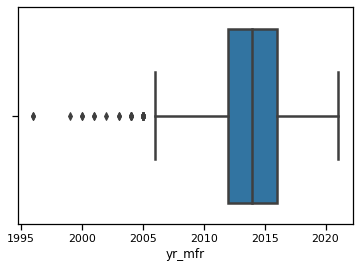

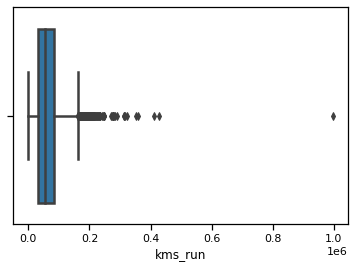

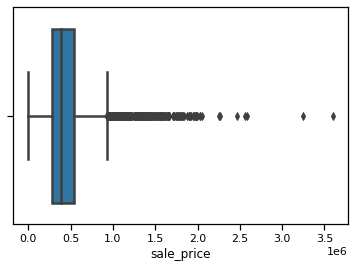

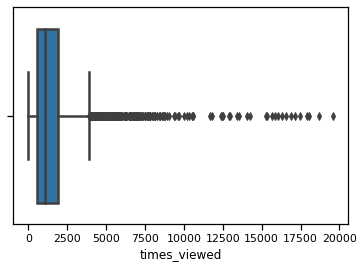

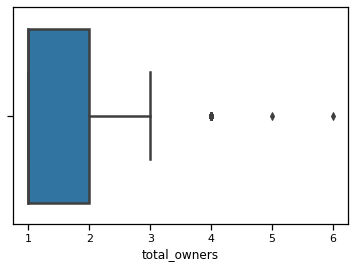

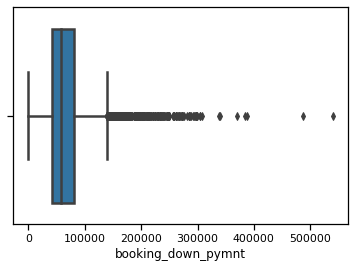

In [ ]:
for i in integer_columns:
  plt.figure()
  sns.boxplot(x=df1[i])

Exploratory Data Analysis


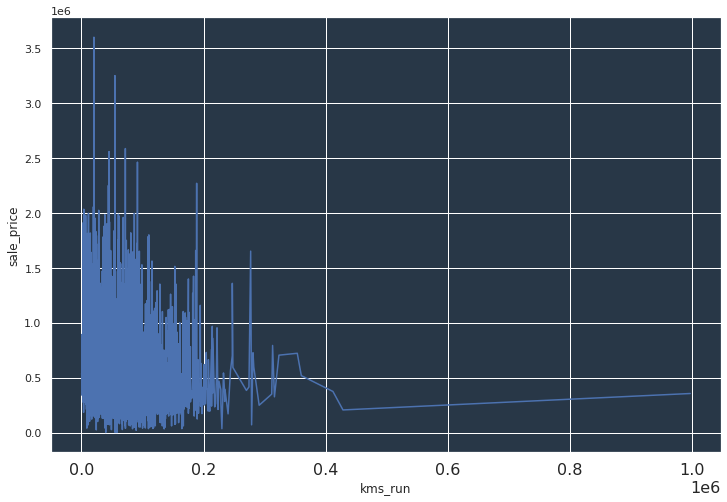

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.lineplot(x='kms_run',y='sale_price',data=df1)

From above graph we can say that there is not much relationship between kms_run and sale_price

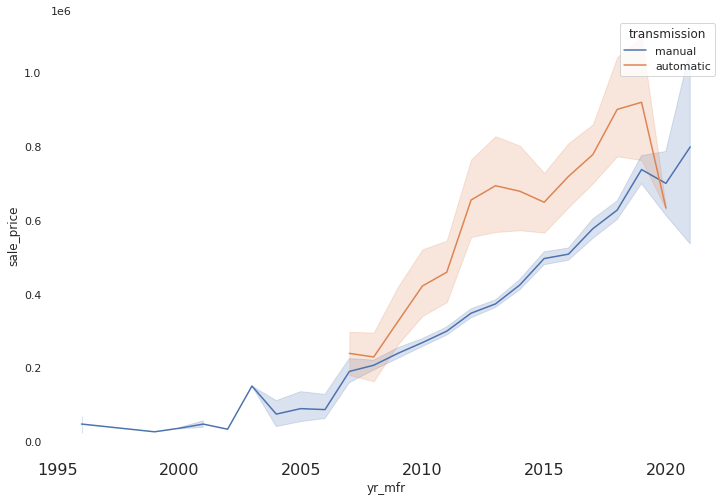

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'white','axes.grid': True,'xtick.labelsize':16})
sns.lineplot(x='yr_mfr',y='sale_price',data=df1,hue='transmission')

From the above figure we can observe the variation in prices of cars of two transmission categories in relation to their manufacturing year.



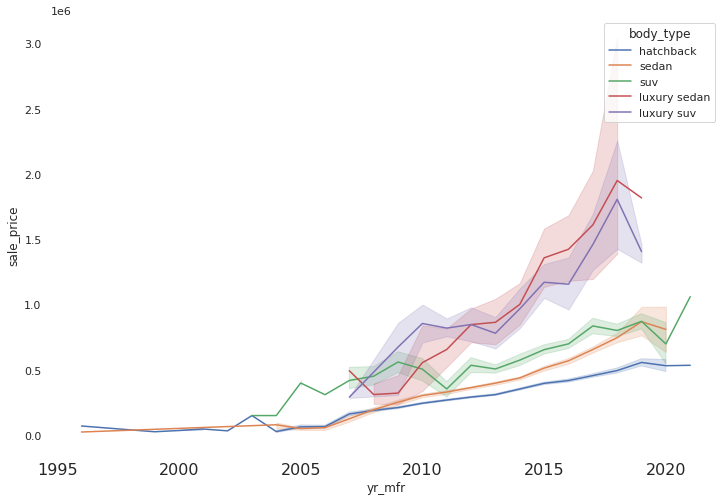

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'white','axes.grid': False,'xtick.labelsize':16})
sns.lineplot(x='yr_mfr',y='sale_price',data=df,hue='body_type')

From the above figure we can observe the variation in prices of cars of different body types in relation to their manufacturing year.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

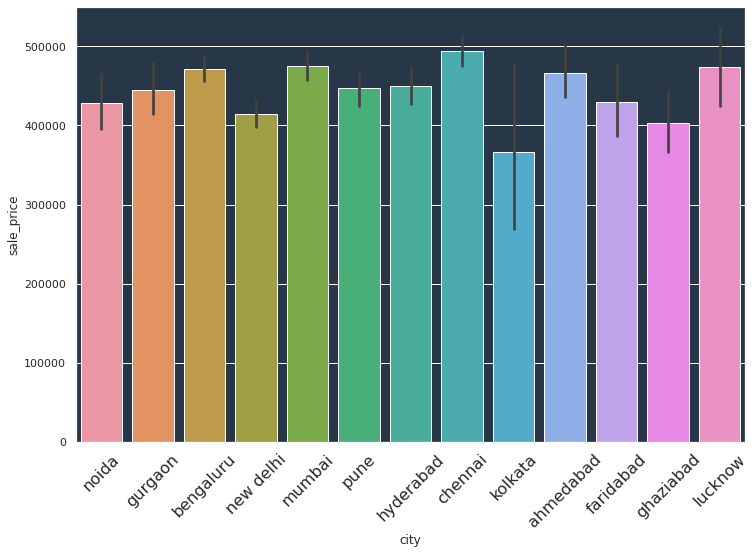

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.barplot(df['city'],df['sale_price'])
plt.xticks(rotation=45)

Loading and Handling Test Data


In [ ]:
df_test=pd.read_csv('/content/Car resale-test.csv')

In [ ]:
df_test.shape

(1000, 30)

In [ ]:
df_test.isnull().sum()

id                       0
car_name                 0
yr_mfr                   0
fuel_type                0
kms_run                  0
sale_price               0
city                     0
times_viewed             0
body_type               13
transmission            82
variant                  0
assured_buy              0
registered_city          2
registered_state         2
is_hot                   0
rto                      0
source                  12
make                     0
model                    0
car_availability        78
total_owners             0
broker_quote             0
original_price         455
car_rating               2
ad_created_on            0
fitness_certificate      0
emi_starts_from          0
booking_down_pymnt       0
reserved                 0
warranty_avail           0
dtype: int64

In [ ]:
df_test1=remove(df_test)

In [ ]:
df_test1.shape

(1000, 26)

In [ ]:
df_test1.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift dzire,2012,petrol,69029,364299,pune,2068,sedan,manual,vxi 1.2 bs iv,...,maruti,swift dzire,in_stock,3,great,2021-03-16T05:00:49.555,True,54645,False,False
1,hyundai eon,2013,petrol,45721,216799,gurgaon,903,hatchback,manual,era plus,...,hyundai,eon,in_stock,1,great,2021-03-10T12:08:11.905,True,32520,False,False
2,honda amaze,2013,diesel,37395,387399,pune,2809,sedan,manual,1.5 smt i dtec,...,honda,amaze,in_stock,1,great,2021-03-15T12:03:30.041,True,58110,True,False
3,hyundai i20,2012,petrol,37652,364699,bengaluru,1054,hatchback,manual,magna o 1.2,...,hyundai,i20,in_transit,3,great,2021-04-09T11:16:26.157,True,54705,True,False
4,hyundai creta,2017,diesel,53648,1082011,lucknow,2927,suv,automatic,1.6 crdi sx plus auto,...,hyundai,creta,in_stock,1,great,2021-04-01T07:24:31.712,True,162302,False,False


Handling null values in test data

In [ ]:
cateogry_columns=df_test1.select_dtypes(include=['object']).columns.tolist()
integer_columns=df_test1.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_test1:
    if df_test1[column].isnull().any():
        if(column in cateogry_columns):
            df_test1[column]=df_test1[column].fillna(df_test1[column].mode()[0])
        else:
            df_test1[column]=df_test1[column].fillna(df_test1[column].mean)

In [ ]:
df_test1.isnull().sum()

car_name               0
yr_mfr                 0
fuel_type              0
kms_run                0
sale_price             0
city                   0
times_viewed           0
body_type              0
transmission           0
variant                0
assured_buy            0
registered_city        0
registered_state       0
is_hot                 0
rto                    0
source                 0
make                   0
model                  0
car_availability       0
total_owners           0
car_rating             0
ad_created_on          0
fitness_certificate    0
booking_down_pymnt     0
reserved               0
warranty_avail         0
dtype: int64

Transformation for feature variables

In [ ]:
X_train=df1.drop('sale_price',axis=1)
Y_train=df1['sale_price'].values

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# get numeric data
num_d = X_train.select_dtypes(exclude=['object'])

# update the cols with their normalized values
X_train[num_d.columns] = sc.fit_transform(num_d)

In [ ]:
X_train.head()

,car_name,yr_mfr,fuel_type,kms_run,city,times_viewed,body_type,transmission,variant,assured_buy,...,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,0.357162,petrol,-1.260935,noida,10.835205,hatchback,manual,lxi opt,0.453663,...,maruti,swift,in_stock,1.172341,great,2021-04-04T07:09:18.583,0.140652,-0.245634,-0.519147,-0.17071
1,maruti alto 800,0.681081,petrol,-0.911850,noida,0.741864,hatchback,manual,lxi,0.453663,...,maruti,alto 800,in_stock,-0.567121,great,2021-03-22T14:07:32.833,0.140652,-0.680913,-0.519147,-0.17071
2,hyundai grand i10,1.004999,petrol,-0.904934,noida,-0.558899,hatchback,manual,sports 1.2 vtvt,0.453663,...,hyundai,grand i10,in_stock,-0.567121,great,2021-03-20T05:36:31.311,0.140652,0.083075,-0.519147,-0.17071
3,maruti swift,-0.290675,diesel,-0.540044,noida,3.155229,hatchback,manual,vdi,0.453663,...,maruti,swift,in_stock,-0.567121,great,2021-01-21T12:59:19.299,0.140652,-0.527899,-0.519147,-0.17071
4,hyundai grand i10,0.357162,petrol,-0.934781,noida,1.087349,hatchback,manual,magna 1.2 vtvt,-2.204279,...,hyundai,grand i10,in_stock,-0.567121,great,2021-04-01T13:33:40.733,0.140652,-0.335282,-0.519147,-0.17071


In [ ]:
X_train.nunique()

car_name                182
yr_mfr                   24
fuel_type                 5
kms_run                6236
city                     13
times_viewed           2947
body_type                 5
transmission              2
variant                 872
assured_buy               2
registered_city         230
registered_state         16
is_hot                    2
rto                     255
source                    3
make                     26
model                   182
car_availability          4
total_owners              6
car_rating                4
ad_created_on          6391
fitness_certificate       2
booking_down_pymnt     4047
reserved                  2
warranty_avail            2
dtype: int64

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in categorical_column 
for i in category_columns:
  X_train[i]= label_encoder.fit_transform(X_train[i])

In [ ]:
X_train.head()

,car_name,yr_mfr,fuel_type,kms_run,city,times_viewed,body_type,transmission,variant,assured_buy,...,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,103,0.357162,2,-1.260935,11,10.835205,0,1,516,0.453663,...,13,148,0,1.172341,2,5196,1,-0.245634,-0.519147,-0.17071
1,86,0.681081,2,-0.911850,11,0.741864,0,1,505,0.453663,...,13,11,0,-0.567121,2,4098,1,-0.680913,-0.519147,-0.17071
2,48,1.004999,2,-0.904934,11,-0.558899,0,1,614,0.453663,...,7,71,0,-0.567121,2,3809,1,0.083075,-0.519147,-0.17071
3,103,-0.290675,0,-0.540044,11,3.155229,0,1,691,0.453663,...,13,148,0,-0.567121,2,1054,1,-0.527899,-0.519147,-0.17071
4,48,0.357162,2,-0.934781,11,1.087349,0,1,530,-2.204279,...,7,71,0,-0.567121,2,5028,1,-0.335282,-0.519147,-0.17071


In [ ]:
X_train1=X_train.values

In [ ]:
X_train1

array([[ 1.03000000e+02,  3.57161926e-01,  2.00000000e+00, ...,
        -2.45634078e-01, -5.19146806e-01, -1.70709827e-01],
       [ 8.60000000e+01,  6.81080630e-01,  2.00000000e+00, ...,
        -6.80913146e-01, -5.19146806e-01, -1.70709827e-01],
       [ 4.80000000e+01,  1.00499933e+00,  2.00000000e+00, ...,
         8.30754251e-02, -5.19146806e-01, -1.70709827e-01],
       ...,
       [ 1.71000000e+02, -1.58635030e+00,  0.00000000e+00, ...,
        -1.42664836e-01, -5.19146806e-01, -1.70709827e-01],
       [ 1.50000000e+02, -9.38512892e-01,  0.00000000e+00, ...,
        -1.09675047e+00, -5.19146806e-01, -1.70709827e-01],
       [ 4.80000000e+01,  3.57161926e-01,  0.00000000e+00, ...,
        -3.76685841e-01, -5.19146806e-01,  5.85789357e+00]])

For Testing data

In [ ]:
X_test=df_test1.drop('sale_price',axis=1)
Y_test=df_test1['sale_price'].values

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# get numeric data
num_d = X_test.select_dtypes(exclude=['object'])

# update the cols with their normalized values
X_test[num_d.columns] = sc.fit_transform(num_d)

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in categorical_column 
for i in category_columns:
  X_test[i]= label_encoder.fit_transform(X_test[i])

In [ ]:
X_test1=X_test.values
X_test1

array([[75.        , -0.58952782,  2.        , ..., -0.29599737,
        -0.51713356, -0.17281816],
       [29.        , -0.26507662,  2.        , ..., -0.7695663 ,
        -0.51713356, -0.17281816],
       [18.        , -0.26507662,  0.        , ..., -0.22183165,
         1.93373641, -0.17281816],
       ...,
       [68.        ,  1.35717934,  2.        , ...,  0.34067192,
        -0.51713356, -0.17281816],
       [18.        ,  0.38382576,  2.        , ..., -0.17977231,
         1.93373641, -0.17281816],
       [60.        ,  0.70827695,  2.        , ..., -0.55349044,
        -0.51713356, -0.17281816]])

In [ ]:
Y_test

array([ 364299,  216799,  387399,  364699, 1082011,  695999,  286399,
        283299,  346399,  205299, 1211594,  715299,  499099,  203899,
        224999,  307999,  157399,  383999,  620299,  188399,  450000,
        210099, 1155236,  242299,  270799,  387899,  417399,  651999,
        305099,  830699,  504899,   89099,  802199, 1389758,  397799,
        394099,  564299,  546199,  288499,  349299,  570399,  541499,
        240899,  443099,  694399,  180000,  416299,  141399,  500000,
        237199,  560999,  616799,  465599,  386799,  382799,  377299,
        626999,  336699,  567199,  520499,  249599,  487499,  419199,
       1248358,  340199,  410599,  366799,  571799,  438299, 1447530,
        415699,  401799,  182199,   89000,  312499, 1490758,  639499,
        102499,  673999,  111000,  267899,  491499,  371899,  726099,
       1112008,  595999,  509099,  444499,  367999, 1367538,  227099,
        328099,  302799,  450399,  359899, 1129683,  200000,  493399,
        490999,  234

Training our Models

A) Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train1,Y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test1)

In [ ]:
tsc1=lr.score(X_test1,Y_test)
tsc1

0.988248994996788

In [ ]:
sc1=lr.score(X_train1,Y_train)
sc1

0.999999999996993

B) Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train1,Y_train)

Lasso()

In [ ]:
y_pred2=lasso_reg.predict(X_test1)

In [ ]:
tsc2=lasso_reg.score(X_train1,Y_train)
tsc2

0.9999930437795305

In [ ]:
sc2=lasso_reg.score(X_test1,Y_test)
sc2

0.9880533355904781

C) Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge()
ridge_reg.fit(X_train1,Y_train)

Ridge()

In [ ]:
y_pred3=ridge_reg.predict(X_test1)

In [ ]:
tsc3=ridge_reg.score(X_train1,Y_train)
tsc3

0.9999999482632647

In [ ]:
sc3=ridge_reg.score(X_test1,Y_test)
sc3

0.9882149567217386

D) Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(X_train1, Y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [ ]:
y_pred4=regressor.predict(X_test1)

In [ ]:
tsc4=regressor.score(X_train1,Y_train)
tsc4

0.9996801832954156

In [ ]:
sc4=regressor.score(X_test1,Y_test)
sc4

0.98580256031791